This notebook visualises the temperature by height above floor level.

In [52]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
import utils

## Load and preprocess data

In [3]:
# get file listing all temperature records
file_rec="records.csv"
df_rec = utils.read_records_file(file_rec)
df_rec.head(3)

,ID,file_name,location,sensor_color
0,1,SalonDijonPeinture_20220829231748.xls,salon_thermostat,yellow
1,2,SalonVagueChaleur_20220815165409.xls,salon_thermostat,yellow
2,3,Salon_20220804092851.xls,salon_thermostat,yellow


In [4]:
df_bas = utils.get_all_data_for_location("chambre_chevet_lucienne_bas", df_rec)
df_moyen = utils.get_all_data_for_location("chambre_chevet_lucienne_haut", df_rec)
df_haut = utils.get_all_data_for_location("chambre_armoire", df_rec)

Treating  chambre_chevet_lucienne_bas EFE228102339_20221228093511.xls
Treating  chambre_chevet_lucienne_haut EFE227102152_20221202174206.xls
Treating  chambre_chevet_lucienne_haut EFE227102152_20221228093907.xls
Treating  chambre_armoire EFE227102191_20221228094239.xls


In [71]:
heights = [27, 70, 192]  # heights above ground level in cm

In [6]:
df_bas["height"] = 27
df_moyen["height"] = 70
df_haut["height"] = 192

In [67]:
# only keep the time period for which we have data with all three sensors
df_moyen = df_moyen[df_moyen.Time > pd.to_datetime('2022-12-19 23:00:00')]

In [68]:
assert len(df_moyen) == len(df_bas)
assert len(df_moyen) == len(df_haut)

In [21]:
df_bas.Time.min()

Timestamp('2022-12-19 23:04:31')

In [22]:
df_moyen.Time.min()

Timestamp('2022-12-19 23:04:24')

In [23]:
df_haut.Time.min()

Timestamp('2022-12-19 23:04:17')

In [69]:
# reset all sensors to have exactly the same timestamps
df_bas["Time"] = df_haut["Time"].values
df_moyen["Time"] = df_haut["Time"].values

In [25]:
df_all = pd.concat((df_bas, df_moyen, df_haut))

In [30]:
df_p = df_all.pivot(index='Time', columns='height', values='Temperature°C')
df_p

height,27,70,192
Time,,,
2022-12-19 23:04:17,16.4,17.5,18.4
2022-12-19 23:19:17,16.4,17.6,18.3
2022-12-19 23:34:17,16.4,17.9,18.6
2022-12-19 23:49:17,16.7,18.0,18.5
2022-12-20 00:04:17,16.7,18.0,18.6
...,...,...,...
2022-12-28 08:19:17,16.0,16.5,16.7
2022-12-28 08:34:17,16.0,16.5,16.7
2022-12-28 08:49:17,16.0,16.4,16.7


## Plot temperature differences

In [34]:
df_p["haut - bas"] = df_p[192] - df_p[27]
df_p["haut - moyen"] = df_p[192] - df_p[70]
df_p["moyen - bas"] = df_p[70] - df_p[27]

In [75]:
fig = go.Figure()

for col in ["haut - bas", "haut - moyen", "moyen - bas"]:
    
    fig.add_trace(go.Scatter(x=df_p.index, y=df_p[col],
                        mode='lines',
                        name=col))
fig.update_layout(yaxis_title="$\Delta T$",
                  title="Temperature differences between sensors")
    
fig.show()

## Plot temperature over time

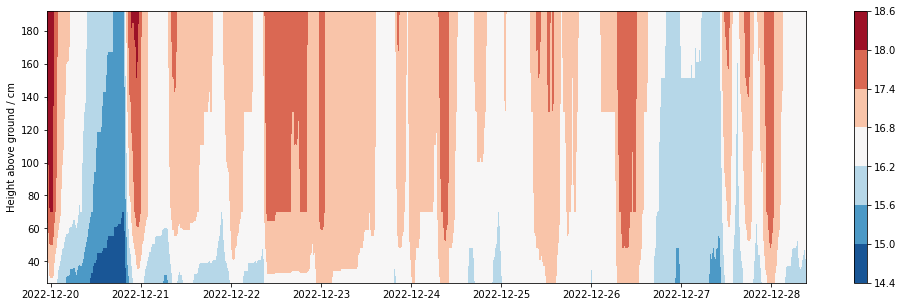

In [79]:
dates = df_p.index
values = df_p[heights].T.values
plt.contourf(dates, heights, values, cmap='RdBu_r')
plt.colorbar()
plt.gcf().set_size_inches((17,5))
plt.ylabel('Height above ground / cm')
plt.show()

In [78]:
fig2 = go.Figure()

fig2.add_trace(go.Contour(z=values,
                          x=dates, # horizontal axis
                          y=heights, # vertical axis
                          colorscale="RdBu_r",
                          line_smoothing=0.85,
                          contours_coloring='heatmap',
                          colorbar=dict(
            title='Temperature / degrees Celcius', # title here
            titleside='right')
                          ))
fig2.update_layout(yaxis_title="Height above ground / cm")